In [1]:
# Required package
import jax
from jax import grad, hessian
import jax.numpy as jnp
import numpy as np

In [2]:
# plot utilities
import matplotlib.pyplot as plt
from Plots.static import static_plot
# %matplotlib inline
# %matplotlib qt 
# %matplotlib nbagg
%matplotlib widget
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

In [3]:
# Optimizer algorithm
from Optimizer.VanillaGD import gd # Gradient Descent
from Optimizer.NormalizedGD import ngd # Normalized GD
from Optimizer.AdaGD import adagrad # ADAGRAD
from Optimizer.RMSPROP import rmsprop # RMSPROP
from Optimizer.Adam import adam # Adam
from Optimizer.Newton import newton # Newton
from Optimizer.NewtonPinv import newtonpinv # Newton with PINV

In [4]:
# Test Functions
from  TestFunction.Functions import rastrigin, ackley, sphere

# Rastrigin function

In [5]:
rastgrad = grad(rastrigin)
rasthess = hessian(rastrigin)

In [6]:
xx = np.linspace(-15, 15, 1000)
yy = np.linspace(-15, 15, 1000)
X, Y = np.meshgrid(xx, yy)
Z = rastrigin(jnp.stack([X, Y]))
Z = Z.reshape(X.shape)

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


Metal device set to: Apple M3 Pro


W0000 00:00:1717618005.897075  399193 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1717618005.904670  399193 service.cc:145] XLA service 0x600001fcd200 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717618005.904678  399193 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1717618005.906348  399193 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1717618005.906356  399193 mps_client.cc:384] XLA backend will use up to 12883132416 bytes on device 0 for SimpleAllocator.


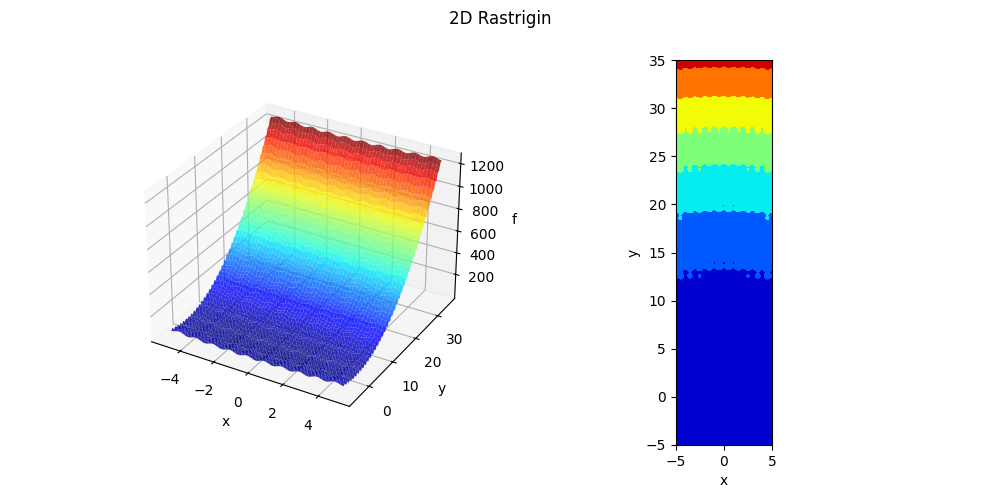

In [53]:
plt.close()
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax1.set_xlabel('x'); ax1.set_ylabel('y')
ax1.set_zlabel('f')
    
# Plot the contour
ax2 = fig.add_subplot(122)
ax2.contourf(X, Y, Z, cmap='jet')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# ax1.set_aspect('equal')
ax2.set_aspect('equal')
plt.suptitle('2D Rastrigin')
plt.show()

In [68]:
x0 = jnp.array([1.0, 1.5])
x1 = jnp.array([0.5, 0.0])
x2 = jnp.array([1, 0.75])
it = 100

In [69]:
hist_grad = gd(rastrigin, rastgrad, x0 , it, 0.001)
hist_ngrad = ngd(rastrigin, rastgrad, x0 , it, 0.01)
hist_adam = adam(rastrigin, rastgrad, x0, it, 0.01)
hist_adagrad = adagrad(rastrigin, rastgrad, x0, it, 0.01)
hist_rmsprop = rmsprop(rastrigin, rastgrad, x0, it, 0.01)
hist_newt = newton(rastrigin, rastgrad, rasthess, x2, it)
hist_newtpinv = newtonpinv(rastrigin, rastgrad, rasthess, x2, it)

Vanilla Gradient Descent:   0%|          | 0/100 [00:00<?, ?it/s]

Normalized GD:   0%|          | 0/100 [00:00<?, ?it/s]

Adam:   0%|          | 0/100 [00:00<?, ?it/s]

AdaGrad:   0%|          | 0/100 [00:00<?, ?it/s]

RMSProp:   0%|          | 0/100 [00:00<?, ?it/s]

Newton's:   0%|          | 0/100 [00:00<?, ?it/s]

Newton's Pinv.:   0%|          | 0/100 [00:00<?, ?it/s]

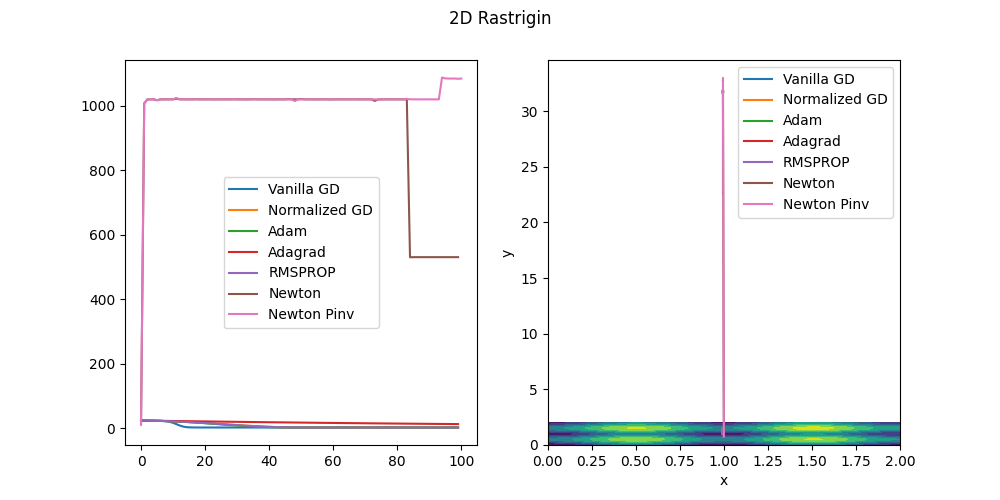

In [70]:
plt.close()
xx = np.linspace(0, 2, 1000)
yy = np.linspace(0, 2, 1000)
X, Y = np.meshgrid(xx, yy)
Z = rastrigin(jnp.stack([X, Y]))
Z = Z.reshape(X.shape)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax1.plot(hist_grad['loss'], '-', label="Vanilla GD")
ax1.plot(hist_ngrad['loss'], '-', label="Normalized GD")
ax1.plot(hist_adam['loss'], '-', label="Adam")
ax1.plot(hist_adagrad['loss'], '-', label="Adagrad")
ax1.plot(hist_rmsprop['loss'], '-', label="RMSPROP")
ax1.plot(hist_newt['loss'], '-', label="Newton")
ax1.plot(hist_newtpinv['loss'], '-', label="Newton Pinv")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.contourf(X, Y, Z)
ax2.plot(hist_grad['weights'][:,0], hist_grad['weights'][:,1], '-', label="Vanilla GD")
ax2.plot(hist_ngrad['weights'][:,0], hist_ngrad['weights'][:,1], '-', label="Normalized GD")
ax2.plot(hist_adam['weights'][:,0], hist_adam['weights'][:,1], '-', label="Adam")
ax2.plot(hist_adagrad['weights'][:,0], hist_adagrad['weights'][:,1], '-', label="Adagrad")
ax2.plot(hist_rmsprop['weights'][:,0], hist_rmsprop['weights'][:,1], '-', label="RMSPROP")
ax2.plot(hist_newt['weights'][:,0], hist_newt['weights'][:,1], '-', label="Newton")
ax2.plot(hist_newtpinv['weights'][:,0], hist_newtpinv['weights'][:,1], '-', label="Newton Pinv")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
plt.suptitle('2D Rastrigin')
plt.show()

In [27]:
xx = np.linspace(-15, 15, 100)
yy = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(xx, yy)
Z = sphere(xx)
# Z = Z.reshape(X)

In [30]:
def sphere_function(x):
    return np.sum(x**2, axis=-1)

def gradient(x):
    return 2 * x

# Generate a 2D grid of input values for visualization
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = sphere_function(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)


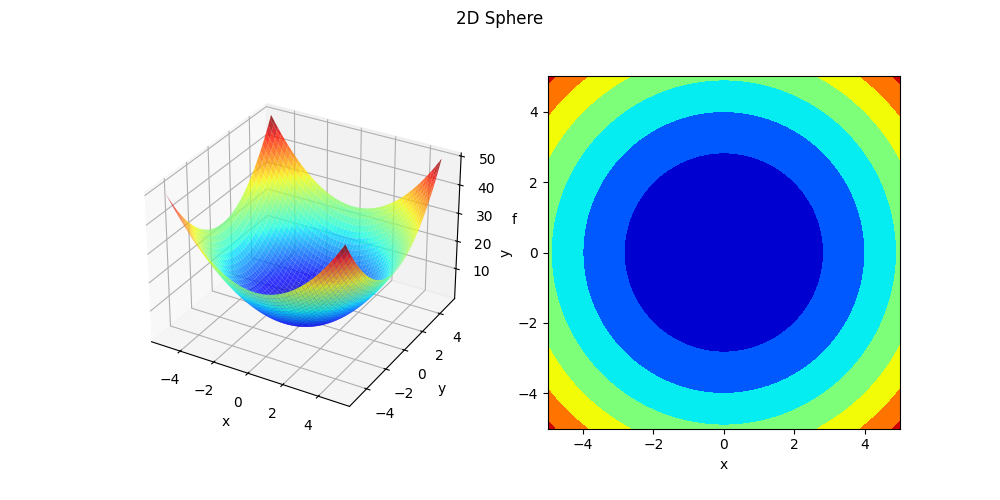

In [34]:
plt.close()
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax1.set_xlabel('x'); ax1.set_ylabel('y')
ax1.set_zlabel('f')
    
# Plot the contour
ax2 = fig.add_subplot(122)
ax2.contourf(X, Y, Z, cmap='jet')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# ax1.set_aspect('equal')
ax2.set_aspect('equal')
plt.suptitle('2D Sphere')
plt.show()